# ONLINE RETAIL TRANSACTION ANALYSIS - Data Visualisation

## Data source: https://www.kaggle.com/datasets/abhishekrp1517/online-retail-transactions-dataset 

## Data analysis goals

Analyse online retail transaction data to understand customer behaviour, identify popular products, and optimise pricing and marketing strategies. Provide insights into customer behaviour, popular products, and pricing strategies to improve sales and marketing efforts.

## Context

The "Online Retail Transaction" dataset contains information on customer transactions made through an online retail platform. It includes data on products purchased, quantities, transaction dates and times, prices, customer identifiers, and customer locations. This dataset can be used to analyse customer behaviour and preferences, identify popular products, and optimise pricing and marketing strategies.

---

Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Set style for matplotlib and seaborn

In [2]:
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

Get current working directory

In [3]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Joy\\Desktop\\Code Institute\\IFP\\jupyter_notebooks'

Make the parent of the current directory the new current directory. 

In [4]:
os.chdir(os.path.dirname(current_dir))
current_dir = os.getcwd()

In [5]:
processed_file_path = current_dir+'\\dataset\\processed\\Online_Retail_Processed.csv'
processed_file_path

'c:\\Users\\Joy\\Desktop\\Code Institute\\IFP\\dataset\\processed\\Online_Retail_Processed.csv'

## Load processed data

In [6]:
# Load cleaned dataset
df_cleaned = pd.read_csv(processed_file_path, dtype={'InvoiceNo': str})
# Preview the first few rows
df_cleaned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalTransaction,Year,Month,DayOfWeek,Hour,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,Wednesday,8,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,Wednesday,8,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,Wednesday,8,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,Wednesday,8,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,Wednesday,8,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524873,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,2011,12,Friday,12,2011-12
524874,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,2011,12,Friday,12,2011-12
524875,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12,Friday,12,2011-12
524876,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,2011,12,Friday,12,2011-12


# Descriptive Statistics: Basic statistics

In [7]:
total_revenue = df_cleaned['TotalTransaction'].sum()
total_customers = df_cleaned['CustomerID'].nunique()
total_products = df_cleaned['StockCode'].nunique()
total_countries = df_cleaned['Country'].nunique()
avg_order_value = df_cleaned.groupby('InvoiceNo')['TotalTransaction'].sum().mean()

print(f"Total Revenue: {total_revenue:,.2f}")
print(f"Total Customers: {total_customers:,}")
print(f"Total Products: {total_products:,}")
print(f"Countries Served: {total_countries}")
print(f"Average Order Value: {avg_order_value:.2f}")

# Date range
print(f"Date Range: {df_cleaned['InvoiceDate'].min()} to {df_cleaned['InvoiceDate'].max()}")

Total Revenue: 10,642,110.80
Total Customers: 4,338
Total Products: 3,922
Countries Served: 38
Average Order Value: 533.17
Date Range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00


# Data Visualisation

Monthly Sales Trend (Matplotlib)

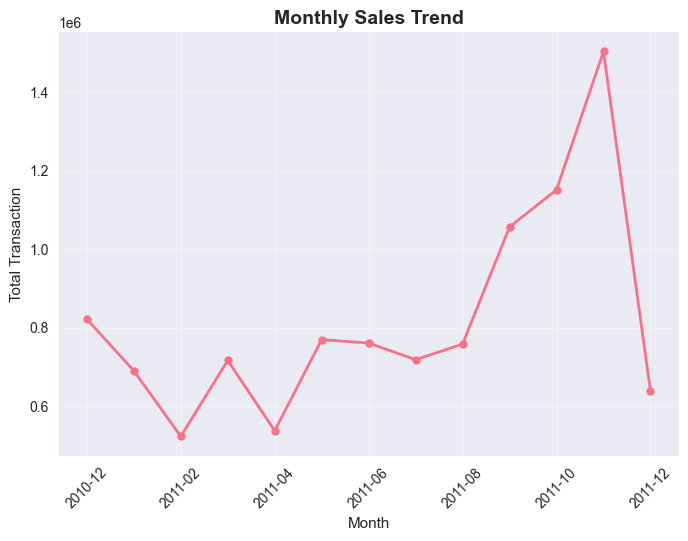

In [8]:
# Group by each month and sum the total transaction value for each month
monthly_sales = df_cleaned.groupby(df_cleaned['YearMonth'])['TotalTransaction'].sum()
monthly_sales.plot(kind='line', marker='o', linewidth=2, markersize=6)
plt.title('Monthly Sales Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total Transaction')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

Top 10 Countries by Revenue

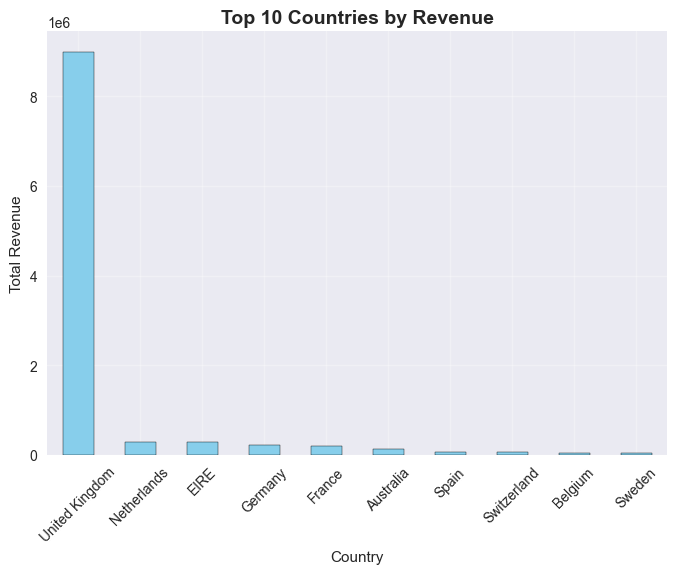

In [9]:
country_sales = df_cleaned.groupby('Country')['TotalTransaction'].sum().sort_values(ascending=False).head(10)
country_sales.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 10 Countries by Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

Top 10 Products by Quantity Sold

Text(0, 0.5, 'Product')

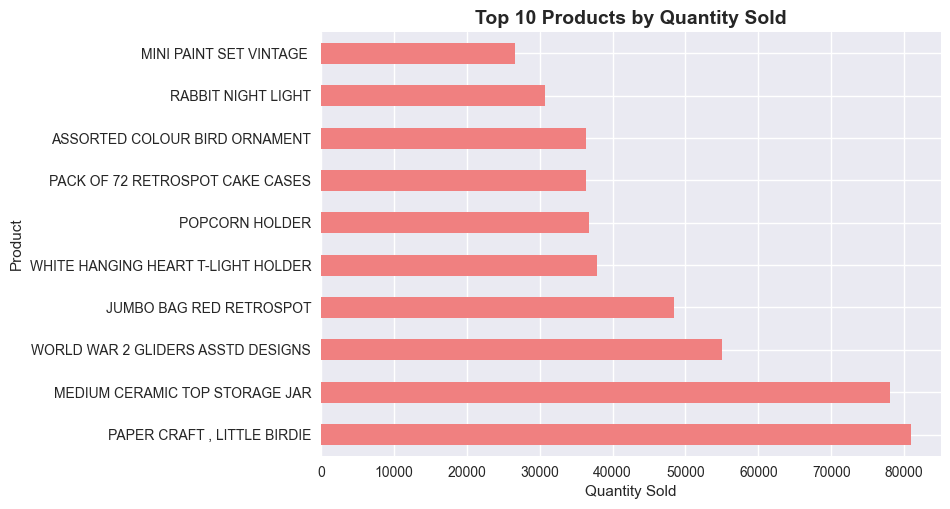

In [10]:
product_quantity = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
product_quantity.plot(kind='barh', color='lightcoral')
plt.title('Top 10 Products by Quantity Sold', fontsize=14, fontweight='bold')
plt.xlabel('Quantity Sold')
plt.ylabel('Product')

Customer Purchase Distribution

Text(0, 0.5, 'Number of Customers')

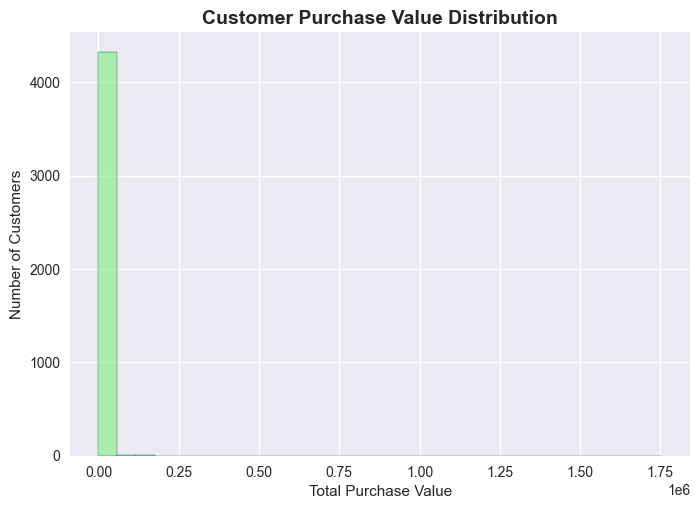

In [11]:
customer_purchases = df_cleaned.groupby('CustomerID')['TotalTransaction'].sum()
plt.hist(customer_purchases, bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Customer Purchase Value Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Total Purchase Value')
plt.ylabel('Number of Customers')